<a href="https://colab.research.google.com/github/hma23/MachineLearning/blob/main/ExtraTree_WithFE_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#To know sklearn version
import sklearn
sklearn_version = sklearn.__version__

print(sklearn_version)

0.23.2


In [3]:
#To show all records for our data frame
pd.set_option("display.min_rows", 200)
pd.set_option("display.max_rows", 500)
pd.get_option("display.max_rows")

500

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Box Output Prdiction

In [5]:
# df = pd.read_excel('/content/drive/MyDrive/data/Book1_new.xlsx')
df = pd.read_excel('/content/drive/MyDrive/data/CPU_Book1_new.xlsx')
#uncomment next line to show all values
df.head(50)

,Block_period,Block_size,Intensity,box_output,Latency,mac_type,Number_of_peers,Ratio of Number of miners to bandwidth
0,1,13,High,89,71.048000,m1.medium,1,0.001
1,2,13,High,43,146.048000,m1.medium,2,0.002
2,3,13,High,28,218.549000,m1.medium,4,0.004
3,4,13,High,20,291.848000,m1.medium,8,0.008
4,5,13,High,17,365.552000,m1.medium,16,0.016
5,6,13,High,14,437.861000,m1.medium,16,0.016
6,7,13,High,12,512.076000,m1.medium,3,0.003
7,8,13,High,11,586.079000,m1.medium,3,0.003
8,9,13,High,10,659.079000,m1.medium,3,0.003
9,10,13,High,9,731.070000,m1.medium,3,0.003


## Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,Block_period,Block_size,box_output,Latency,Number_of_peers,Ratio of Number of miners to bandwidth
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,6.631579,12.226316,46.052632,412.643607,5.710526,0.005711
std,3.824324,3.342265,62.498824,387.241382,5.235754,0.005236
min,1.000000,7.000000,3.000000,11.035000,1.000000,0.001000
25%,4.000000,10.000000,9.250000,104.718917,3.000000,0.003000
50%,5.000000,13.000000,26.000000,251.401000,3.000000,0.003000
75%,10.000000,14.000000,62.000000,659.292825,8.000000,0.008000
max,14.000000,21.000000,589.000000,1645.100000,16.000000,0.016000


In [7]:
#sns.pairplot(df, height=3, aspect=1.3)

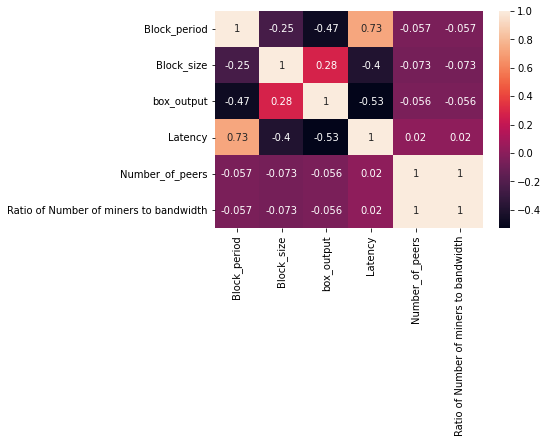

In [8]:
sns.heatmap(df.corr(), annot=True)

NameError: ignored

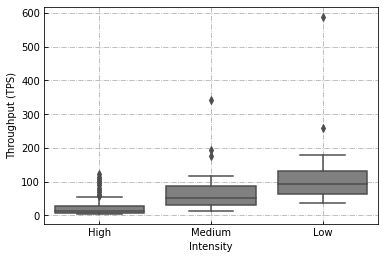

In [9]:
#sns.boxplot(x="Intensity", y="box_output", data=df)
ax=sns.boxplot(x="Intensity", y="box_output", data=df, color='grey')
ax.grid('both', linestyle='-.')
ax.set_ylabel('Throughput (TPS)')
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
plt.savefig('/content/drive/MyDrive/data/Throughput.eps', format='eps', dpi=1000)

In [ ]:
#sns.boxplot(x="Intensity", y="Latency", data=df)
ax1=sns.boxplot(x="Intensity", y="Latency", data=df, color='grey')
ax1.grid('both', linestyle='-.')
ax1.set_ylabel('Latency (seconds)')
ax1.set_axisbelow(True)
ax1.tick_params(axis='both', direction='in')
plt.savefig('/content/drive/MyDrive/data/Latency.eps', format='eps', dpi=1000)

## Data Preprocessing

In [ ]:
df.drop('Number_of_peers', axis=1, inplace=True)
df_output = df.copy()

#drop latency because it's output variable and can not be used as input features for another outputs
df_output.drop('Latency', axis=1, inplace=True)

#First approach
# Make dummies for our categorial variables to make it able to insert to machine learning models
df_ouput_dum = pd.get_dummies(df_output, prefix=['Intensity'], columns=['Intensity'])

#uncomment next line to show all values
# df_ouput_dum

In [ ]:
#Second approch
# We will try to convert the Intensity to ordinal numbers and see the difference in accuracy using pycaret 
df_ouput_ord = df_output.copy()
df_ouput_ord = df_ouput_ord.replace({"Intensity":{"Low": 23600, "Medium": 35788, "High":143362 }})
df_ouput_ord = df_ouput_ord.replace({"mac_type":{"m1.medium": 2, "m1.large": 4, "m1.xlarge":8 }})

#uncomment next line to show all values
# df_ouput_ord

## Comparison between different Models

### setup pycaret

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.regression import *

### Comparison between predictions of Throughput

In [ ]:
#just make comparison without ratio featuer because it will filtered in selectfrommodel function in next cells
df_pycaret = df_ouput_ord.copy()
df_pycaret.drop('Ratio of Number of miners to bandwidth', axis=1,inplace = True)
exp_reg101 = setup(data = df_pycaret, target = 'box_output', numeric_features = ['Block_period','Block_size','Intensity','mac_type'], session_id=123)

In [ ]:
compare_models()

**After applying pycaret regression with intensty numeric ordinal and dummies variable we note that max accuracy for dummies approch with is with gradiant boast regressor with R2 = .93 and for numeric ordinal, the best model is extra tree regressor with R2 = .94 so numeric approach is slightly better than dummy variable**

### Feature selection based on select from model function

---



In [ ]:
#create dummy variables to test if featuer selection will erase them or not
dummy_df = df_ouput_ord.copy()
# np.random.seed(2)
# dummy_df['dummy1'] = np.random.choice([.001,.002,.005,.008,300000,.905,6000,4.5,2.005], size=190)
# dummy_df['dummy2'] = np.random.choice([.000001,10,10.5,10.6,.1255,5000,4.5,1.01], size=190)
# dummy_df['dummy3'] = np.random.choice([.001,10,1000,.141,.1255,5000,4.5,1.001,2,3,4], size=190)
# dummy_df['dummy4'] = np.random.choice([0,1,10,50], size=190)

#create catagorial dummy variable
# dummy_df['dummy5'] = np.random.choice(['hima','govind','bi'], size=190)
# dummy_df = pd.get_dummies(dummy_df, prefix=['dummy5'], columns=['dummy5'])

dummy_df.head()

In [ ]:
#split our data to y that contain our output "box_output" and to x that conatin the featuers inputs for our model
y_output=dummy_df["box_output"]
x_output=dummy_df.copy()
x_output.drop(columns = ['box_output'],inplace = True)
x_output.head()

In [ ]:
#For regression models
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor

feature_names = np.array(x_output.columns)
selector = SelectFromModel(estimator=ExtraTreesRegressor(random_state=35),threshold=0.04).fit(x_output, y_output)
selector.estimator_.feature_importances_ 

In [ ]:
x_trans = selector.transform(x_output)
x_trans.shape

In [ ]:
x_trans = pd.DataFrame(x_trans)
x_trans.columns = feature_names[selector.get_support()]
x_trans.head()

## Get Best Random state

In [ ]:
#here I made a function that looping over different random states to get the best one that get best accurecy 
from sklearn.ensemble import ExtraTreesRegressor

def reg_out(rand):
  for i in range(rand):
    print('random state is',i)
    X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_trans, y_output, test_size = 0.2, random_state = i)
    reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
                        verbose=0, warm_start=False).fit(X_train_output, y_train_output)

    R2_score = reg.score(X_test_output, y_test_output)
    print("R2 score for this model is", R2_score)
    y_pred_output = reg.predict(X_test_output)
    MSE = ((y_pred_output-y_test_output)**2).mean()
    RMSE = (((y_pred_output-y_test_output)**2).mean())**.5
    print("RMSE score for this model is", RMSE)

# reg_out(50)

## Extra Tree regressor for Throughput prediction

In [ ]:
#from above equation we can note that the best random state is 1 to make model learning well and generlize for validation data
X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_trans, y_output, test_size = 0.2, random_state = 12)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
                    verbose=0, warm_start=False).fit(X_train_output, y_train_output)

R2_score = reg.score(X_test_output, y_test_output)
print("R2 score for this model is", R2_score)
y_pred_output = reg.predict(X_test_output)
MSE = ((y_pred_output-y_test_output)**2).mean()
RMSE = (((y_pred_output-y_test_output)**2).mean())**.5
print("RMSE score for this model is", RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error
sk_mse_out = mean_squared_error(y_test_output, y_pred_output)
sk_rmse_out = sk_mse_out**.5
print("RMSE score for this model is", sk_rmse_out)

### Hyperparameter tuning for Extra tree model using grid search function 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
#define your own mse and set greater_is_better=False
# mse = make_scorer(mean_squared_error,greater_is_better=False)

etr = ExtraTreesRegressor().fit(X_train_output, y_train_output)
                            
param_grid = {
    'n_estimators': [100,120],
    'criterion': ['mse', 'mae'],
    'max_features': ['auto','sqrt','log2'],  
    'min_samples_split': [1,2]
}

gcv = GridSearchCV(etr,param_grid,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1).fit(X_train_output,y_train_output)

print("Best: %f using %s" % (gcv.best_score_, gcv.best_params_))

**We can note here that the grid search here don't give help to us because we not able to minmize the rmse using it. Hyperparameter tuning does not give staisfactory results for Throughpur prediction through ExtraTree reression- It is not needed in this scenario**

## MAE Visualization

In [ ]:
x_trans.head()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def get_mae(model):
  train_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
  mae_list = []

  #recreate dataframe from x_trans and y_lat
  df_output = x_trans.copy()
  df_output['box_output'] = y_output

  for size in train_size:
    #get random required size from our data
    df_output_sampled = df_output.sample(frac=size,random_state=3)

    #x
    x_output_sample=df_output_sampled.copy()
    x_output_sample.drop(columns = ['box_output'],inplace = True)

    #y
    y_output_sample=df_output_sampled["box_output"]


    X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_output_sample, y_output_sample, test_size = 0.2, random_state = 2)
    reg = model().fit(X_train_output, y_train_output)
    y_pred_output = reg.predict(X_test_output)
    mae = mean_absolute_error(y_test_output,y_pred_output)
    mae_list.append(mae)
  return mae_list

models = {'Gpr':GradientBoostingRegressor,'et':ExtraTreesRegressor,'rf':RandomForestRegressor}

mae_vis = pd.DataFrame()
mae_vis['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']

for model_key,model_val in models.items():
  mae_vis[f'mae_of {model_key}'] = get_mae(model_val)
mae_vis

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mae_vis['Data size'], mae_vis['mae_of Gpr'], 'ko-',markersize=10, label='MAE of gpr')
plt.plot(mae_vis['Data size'], mae_vis['mae_of et'],'^k-',markersize=10, label='MAE of et')
plt.plot(mae_vis['Data size'], mae_vis['mae_of rf'],'Pk-',markersize=10, label='MAE of rf')
plt.ylabel('MAE')
plt.xlabel('Train data size (%)')
plt.legend()
plt.show()

## RMSE Visualization

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def RMSE_model(rand,model,X,y):
  rmse_list = []
  for i in range(rand):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    reg = model().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    RMSE = (((y_pred-y_test)**2).mean())**.5
    rmse_list.append(RMSE)
  return rmse_list


models = {'Gpr':GradientBoostingRegressor,'et':ExtraTreesRegressor,'rf':RandomForestRegressor}

rmse_fe = pd.DataFrame()

#for featuered engineerd data
for model_key,model_val in models.items():
  rmse_fe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_trans,y_output)

rmse_fe_melted=pd.melt(rmse_fe)
rmse_fe_melted['type'] = 'fe'
rmse_fe_melted.head()

In [ ]:
#for NON featuered engineerd data
rmse_nonfe = pd.DataFrame()
for model_key,model_val in models.items():
  rmse_nonfe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_output,y_output)

rmse_nonfe_melted=pd.melt(rmse_nonfe)
rmse_nonfe_melted['type'] = 'nonfe'
# rmse_nonfe_melted

In [ ]:
rmse_all = pd.concat([rmse_fe_melted,rmse_nonfe_melted])
rmse_all

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x="variable", y="value", hue="type",
                 data=rmse_all, palette="Set3")
plt.legend(loc='upper left')
plt.ylabel('RMSE Range')
plt.xlabel('Model')
plt.show()

# Latency Prediction 


## Data preprocessing

In [ ]:
df_latency = df.copy()

#drop box_output because it is output variable and cannot be used as input features for another outputs
df_latency.drop('box_output', axis=1, inplace=True)

#First approch
# Make dummies for our catagorial variables to make it able to insert to machine learning models
df_laten_dum = pd.get_dummies(df_latency, prefix=['Intensity'], columns=['Intensity'])
#uncomment next line to show all values
# df_laten_dum

In [ ]:
#Secound approch
#for numircal ordinal variable approche
df_laten_ord = df_latency.copy()
df_laten_ord = df_laten_ord.replace({"Intensity":{"Low": 23600, "Medium": 35788, "High":143362 }})
df_laten_ord = df_laten_ord.replace({"mac_type":{"m1.medium": 2, "m1.large": 4, "m1.xlarge":8 }})

#uncomment one of next line to show it's values
# df_laten_ord

## Comparison between different models in pycaret

In [ ]:
#just make comparison without ratio featuer because it will filtered in selectfrommodel function in next cells
df_pycaret = df_ouput_ord.copy()
df_pycaret.drop('Ratio of Number of miners to bandwidth', axis=1,inplace = True)
exp_reg101 = setup(data = df_laten_ord, target = 'Latency', numeric_features = ['Block_period','Block_size','Intensity','mac_type'], session_id=123)

In [ ]:
compare_models()

## Feature selection based on 'select from model' function for Latency


In [ ]:
#create dummy variables to test if featuer selection will erase them or not
dummy_lat_df = df_laten_ord.copy()
# np.random.seed(2)
# dummy_lat_df['dummy1'] = np.random.choice([.001,.002,.005,.008,300000,.905,6000,4.5,2.005], size=190)
# dummy_lat_df['dummy2'] = np.random.choice([.000001,10,10.5,10.6,.1255,5000,4.5,1.01], size=190)
# dummy_lat_df['dummy3'] = np.random.choice([.001,10,1000,.141,.1255,5000,4.5,1.001,2,3,4], size=190)
# dummy_lat_df['dummy4'] = np.random.choice([0,1,10,50], size=190)

# #cretae catagorial dunny variable
# dummy_lat_df['dummy5'] = np.random.choice(['hima','ahmed','hagras'], size=190)
# dummy_lat_df = pd.get_dummies(dummy_lat_df, prefix=['dummy5'], columns=['dummy5'])
dummy_lat_df.head()

In [ ]:
#split our data to y that contain our output "Latency" and to x that conatin the featuers inputs for our model
y_lat=dummy_lat_df["Latency"]
x_lat=dummy_lat_df.copy()
x_lat.drop(columns = ['Latency'],inplace = True)
# x_lat.head()

#split x,y to train and test to measure the accurcy of the model
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_lat, y_lat, test_size = .2, random_state = 43)

In [ ]:
#As featuer engineering we will use the featuers got from pervious featuer engineer in output prdiction
x_trans.head()

## Extra Tree Regressor for Latency

In [ ]:
#here I made a function that looping over different random states to get the best one that get best accurecy 
from sklearn.ensemble import ExtraTreesRegressor

def reg_out(rand):
  for i in range(rand):
    print('random state is',i)
    X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_trans, y_lat, test_size = .2, random_state = i)
    reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
                        verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)

    R2_score = reg.score(X_test_lat, y_test_lat)
    print("R2 score for this model is", R2_score)
    y_pred_lat = reg.predict(X_test_lat)
    MSE = ((y_pred_lat-y_test_lat)**2).mean()
    RMSE = (((y_pred_lat-y_test_lat)**2).mean())**.5
    print("RMSE score for this model is", RMSE)

# reg_out(50)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_trans, y_lat, test_size = .2, random_state = 1)
reg_lat = ExtraTreesRegressor(n_estimators=100, random_state=0, bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_jobs=-1, oob_score=False,
                    verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)
# reg.score(X_test_lat, y_test_lat)

R2_score = reg_lat.score(X_test_lat, y_test_lat)
print("R2 score for this model is", R2_score)
y_pred_lat = reg_lat.predict(X_test_lat)
MSE = ((y_pred_lat-y_test_lat)**2).mean()
RMSE = (((y_pred_lat-y_test_lat)**2).mean())**.5
print("RMSE score for this model is", RMSE)


In [ ]:
# RMSE for validation data
from sklearn.metrics import mean_squared_error
sk_mse = mean_squared_error(y_test_lat, y_pred_lat)
sk_rmse = sk_mse**.5
print("RMSE score for this model is", sk_rmse)

## Hyperparameter tuning for Latency prediction

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

etr_lat = ExtraTreesRegressor(n_estimators=100,random_state=0, bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_jobs=-1, oob_score=False,
                    verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)

                            
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [50,60,80,None],
    'max_features': ['auto','sqrt','log2'],    
}

gcv = GridSearchCV(etr_lat,param_grid,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1).fit(X_train_lat,y_train_lat)

print("Best: %f using %s" % (gcv.best_score_, gcv.best_params_))

## MAE Visualization For Latency

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def get_mae(model_val):
  train_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
  mae_list = []

  #recreate dataframe from x_trans and y_lat
  df_lat = x_trans.copy()
  df_lat['Latency'] = y_lat

  for size in train_size:
    #get random required size from our data
    df_lat_sampled = df_lat.sample(frac=size,random_state=7)

    #x
    x_lat_sample=df_lat_sampled.copy()
    x_lat_sample.drop(columns = ['Latency'],inplace = True)

    #y
    y_lat_sample=df_lat_sampled["Latency"]


    X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_lat_sample, y_lat_sample, test_size = 0.2, random_state = 44)
    reg = model_val().fit(X_train_lat, y_train_lat)
    y_pred_lat = reg.predict(X_test_lat)
    mae = mean_absolute_error(y_test_lat,y_pred_lat)
    mae_list.append(mae)
  return mae_list

models = {'Gpr':GradientBoostingRegressor,'et':ExtraTreesRegressor,'rf':RandomForestRegressor}

mae_vis_lat = pd.DataFrame()
mae_vis_lat['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
# mae_vis = mae_vis.set_index('Data size')

for model_key,model_val in models.items():
  mae_vis_lat[f'mae_of {model_key}'] = get_mae(model_val)
mae_vis_lat

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mae_vis_lat['Data size'], mae_vis_lat['mae_of Gpr'], 'ko-',markersize=10, label='MAE of gpr')
plt.plot(mae_vis_lat['Data size'], mae_vis_lat['mae_of et'],'^k-',markersize=10, label='MAE of et')
plt.plot(mae_vis_lat['Data size'], mae_vis_lat['mae_of rf'],'Pk-',markersize=10, label='MAE of rf')
plt.ylabel('MAE')
plt.xlabel('Train data size (%)')
plt.legend()
plt.show()

## RMSE Visualization For Latency

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def RMSE_model(rand,model,X,y):
  rmse_list = []
  for i in range(rand):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    reg = model().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    RMSE = (((y_pred-y_test)**2).mean())**.5
    rmse_list.append(RMSE)
  return rmse_list


models = {'Gpr':GradientBoostingRegressor,'et':ExtraTreesRegressor,'rf':RandomForestRegressor}

rmse_lat_fe = pd.DataFrame()

#for featuered engineerd data
for model_key,model_val in models.items():
  rmse_lat_fe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_trans,y_lat)

rmse_lat_fe_melted=pd.melt(rmse_lat_fe)
rmse_lat_fe_melted['type'] = 'fe'
rmse_lat_fe_melted.head()

In [ ]:
#for NON featuered engineerd data
rmse_lat_nonfe = pd.DataFrame()
for model_key,model_val in models.items():
  rmse_lat_nonfe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_lat,y_lat)

rmse_lat_nonfe_melted=pd.melt(rmse_lat_nonfe)
rmse_lat_nonfe_melted['type'] = 'nonfe'
# rmse_lat_nonfe_melted

In [ ]:
rmse_all_lat = pd.concat([rmse_lat_fe_melted,rmse_lat_nonfe_melted])
# rmse_all_lat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x="variable", y="value", hue="type",
                 data=rmse_all_lat, palette="Set3")

plt.ylabel('RMSE Range')
plt.xlabel('Model')
plt.show()